In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')

# Taking a look at the first several winners
display(nobel.head(6))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [2]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel))
# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())
# Display the number of prizes won by the top 10 nationalities.
display(nobel['birth_country'].value_counts())

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America                         259
United Kingdom                                    85
Germany                                           61
France                                            51
Sweden                                            29
                                                ... 
Union of Soviet Socialist Republics (Belarus)      1
Trinidad                                           1
Ukraine                                            1
Austria-Hungary (Ukraine)                          1
Java, Dutch East Indies (Indonesia)                1
Name: birth_country, Length: 121, dtype: int64

In [3]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == "United States of America"
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype('int')
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean() 

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


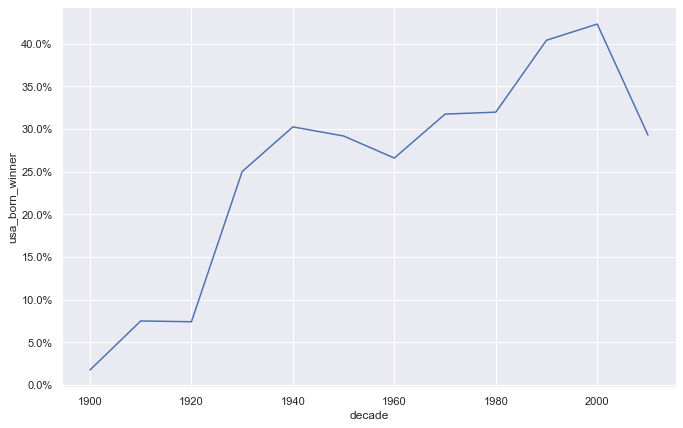

In [4]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y ='usa_born_winner', data= prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

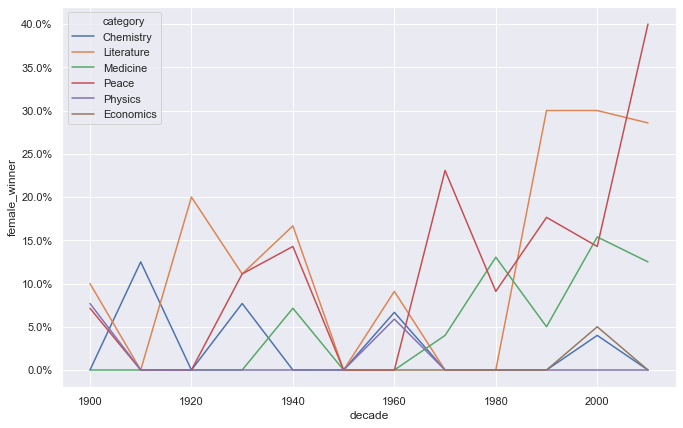

In [5]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y ='female_winner', data= prop_female_winners, hue='category')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

In [6]:
# Picking out the first woman to win a Nobel Prize
Women = nobel[nobel['sex'] == 'Female']
display(Women.nsmallest(1,'year'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


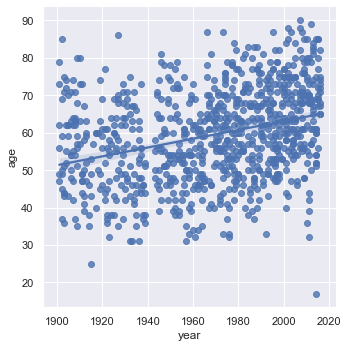

In [7]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(data=nobel, x='year', y='age')

plt.show()


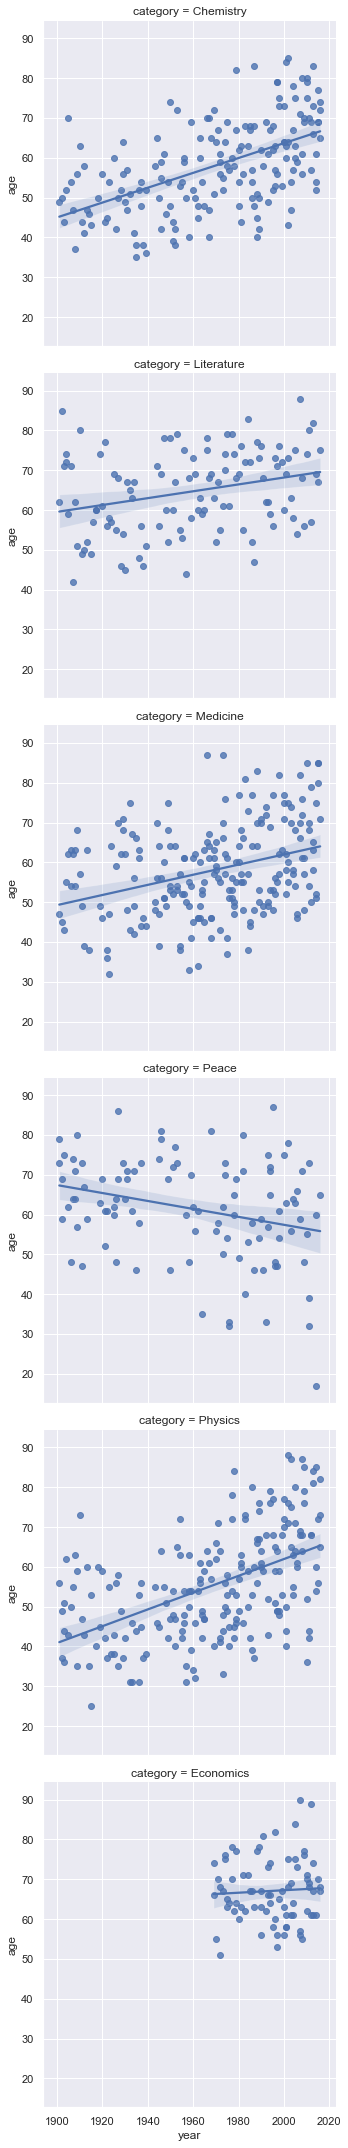

In [8]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(data=nobel, x='year', y='age', row= 'category')
plt.show()

In [9]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel[nobel['year'] == 2016].nlargest(1, 'age'))
# The youngest winner of a Nobel Prize as of 2016
display(nobel[nobel['year'] == 2016].nsmallest(1, 'age'))


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,...,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,False,2010,False,82.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
902,2016,Chemistry,The Nobel Prize in Chemistry 2016,"""for the design and synthesis of molecular mac...",1/3,933,Individual,Bernard L. Feringa,1951-05-18,Barger-Compascuum,...,University of Groningen,Groningen,Netherlands,NaN,NaN,NaN,False,2010,False,65.0
